Por favor, insira o número de telefone: 5151
Arquivo de áudio 'dtmf_soms.wav' gerado com sucesso.


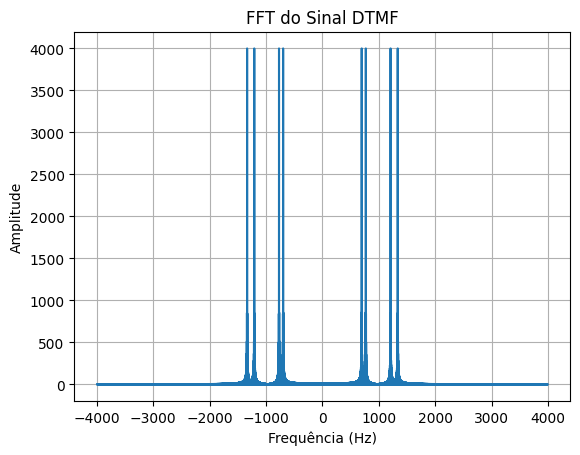

Frequência dominante: 697.00 Hz
Frequências com a máxima amplitude: [  696.   697.   698.   769.   770.   771.  1208.  1209.  1210.  1335.
  1336.  1337. -1337. -1336. -1335. -1210. -1209. -1208.  -771.  -770.
  -769.  -698.  -697.  -696.]
Número original:  5151
Número identificado:  5151


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import soundfile as sf
import IPython.display as ipd

# Frequências DTMF
freq_dtmf = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    '0': (941, 1336),
    '*': (941, 1209),
    '#': (941, 1477)
}

def gera_dtmf(digito, duracao=0.5, sr=8000):
    freq1, freq2 = freq_dtmf[digito]
    t = np.linspace(0, duracao, int(sr * duracao), endpoint=False)
    som = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)
    return som

def aplica_fft(sinal, sr):
    """Aplica a FFT no sinal"""
    N = len(sinal)
    yf = fft(sinal)
    xf = fftfreq(N, 1 / sr)
    return xf, np.abs(yf)

def digito_id(freqs):
    """Identifica o dígito a partir das frequências dominantes"""
    for digito, (f1, f2) in freq_dtmf.items():
        if (np.any(np.isclose(freqs, f1, atol=10)) and
                np.any(np.isclose(freqs, f2, atol=10))):
            return digito
    return None

def main():
    # Solicita ao usuário um número de telefone
    numero = input("Por favor, insira o número de telefone: ")
    sr = 8000
    sons = []

    # Gera os tons DTMF para cada dígito
    for digito in numero:
        som = gera_dtmf(digito, duracao=0.5, sr=sr)
        sons.append(som)

    sinal = np.concatenate(sons)

    # Salva o sinal em um arquivo de áudio
    sf.write('dtmf_soms.wav', sinal, sr)
    print("Arquivo de áudio 'dtmf_soms.wav' gerado com sucesso.")

    # Aplica a FFT no sinal e plota o gráfico das frequências dominantes
    xf, yf = aplica_fft(sinal, sr)

    # Encontrar a frequência dominante
    freq_dominante = xf[np.argmax(yf)]
    max_amplitude_freq = xf[np.where(yf > np.max(yf) * 0.5)]

    plt.plot(xf, yf)
    plt.title("FFT do Sinal DTMF")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

    print(f"Frequência dominante: {freq_dominante:.2f} Hz")
    print(f"Frequências com a máxima amplitude: {max_amplitude_freq}")

    # Identifica os dígitos a partir da FFT
    numero_id = ""
    for i in range(0, len(sinal), int(0.5 * sr)):
        faixa = sinal[i:i + int(0.5 * sr)]
        xf, yf = aplica_fft(faixa, sr)
        freqs = xf[np.where(yf > np.max(yf) * 0.5)]
        digito = digito_id(freqs)
        if digito:
            numero_id += digito

    print("Número original: ", numero)
    print("Número identificado: ", numero_id)

if __name__ == "__main__":
    main()

    ipd.display(ipd.Audio('dtmf_soms.wav'))
